## Generalized Linear Models

3 components
- An exponential family model for the response
- A systematic component via a linear predictor
- A link function that connects the means of the response to the linear predictor

### Example, linear models
- Assume $Y_i \sim \mathcal{N} \left( \mu_i, \sigma^2 \right)$, i.e. the Gaussian distribution is an exponential family distribution
- Define the linear predictor to be $\eta_i = \sum_{k=1}^{p} X_{ik} \beta_{k}$
- The **link function** as $g$ so that $g(\mu) = \eta$
    - For linear models $g(\mu) = \mu$ so that $\mu_i = \eta_i$
    
### Example, logistic regression
- Assume $Y_i \sim \text{Bernoulli} \left( \mu_i \right)$ so that $E[Y_i] = \mu_i$ where $0 \le \mu_i \le 1$
- Linear predictor $\eta_i = \sum_{k=1}^{p} X_{ik} \beta_{k}$
- The **link function** $g$ so that $g(\mu) = \eta = \log\left( \frac{\mu}{1-\mu} \right)$ is the (natural) log odds, referred to as the **logit**
- **Binomial likelihood function**  
$\prod_{i}^{n} \mu_{i}^{y_{i}} \left( 1-\mu_i \right)^{1-y_i} = \exp \left( \sum_{i=1}^{n} y_i \eta_i \right) \prod_{i=1}^{n} \left(1 + \eta_{i} \right)^{-1}$  
    - Maximize the likelihood to obtain our parameter estimates

### Example, logistic regression
- Assume that $Y_i \sim \text{Poisson}(\mu_i)$ so that $E[Y_i] = \mu_i$ where $0 \le \mu_i$
- Linear predictor $\eta_i = \sum_{k=1}^{p} X_{ik} \beta_{k}$
- **Link function** $g(\mu) = \eta = \log(\mu) \rightarrow \mu = \exp(\eta)$

### Some things to note
- In each case, the only way in which the likelihood depends on the data is through  
$\sum_{i=1}^{n} y_i \eta_i = \sum_{i=1}^{n} y_i \sum_{k=1}^{p} X_{ik} \beta_{k} = \sum_{k=1}^{p} \beta_{k} \sum_{i=1}^{n} X_{ik} y_i$
- The **maximum likelihood** looks like sort of an equation that we would want to solve  
$0 = \sum_{i=1}^{n} \frac{Y_i - \mu_i}{\text{Var}(Y_i)} W_{i}$

### About variances
- For the liner model $\text{Var} (Y_i) = \sigma^2$ is constant
- Howerver, for Bernoulli case $\text{Var} (Y_i) = \mu_i \left( 1 - \mu_i \right)$
- For the Poisson case $\text{Var} (Y_i) = \mu_i$

the `quasi-` functions, e.g. `quasi-poisson, quasi-binomial` are used

### Odds and ends
- The normal equations have to be solved iteratively, resulting in $\hat{\beta}_k$ and, if included, $\hat{\phi}$
- **Predicted liner predictor responses** can be obtained as $\hat{\eta} = \sum_{k=1}^{p} X_k \hat{\beta}_k$
- **Coefficient** $\beta_k = g\left( E \left[ Y | X_{k} = x_k + 1, X_{\sim k} = x_{\sim k} \right]\right) - g\left( E \left[ Y | X_{k} = x_k, X_{\sim k} = x_{\sim k} \right]\right)$

### Inference
- We also lose the nice collection of closed form, normal inferences, e.g. t-distribution

## Logistic Regression

Binary GLMs come from trying to model outcomes that can take only two values. Some examples include: survival or not at the end of a study, winning versus losing of a team and success versus failure of a treatment or product. Often these outcomes are called Bernoulli outcomes, from the Bernoulli distribution named after the famous probabilist and mathematician.

If we happen to have several exchangeable binary outcomes for the same level of covariate values, then that is binomial data and we can aggregate the 0’s and 1’s into the count of 1’s. As an example, imagine if we sprayed insect pests with 4 different pesticides and counted whether they died or not. Then for each spray, we could summarize the data with the count of dead and total number that were sprayed and treat the data as binomial rather than Bernoulli.

### Example Baltimore Ravens win/loss

In [9]:
# download.file("https://dl.dropboxusercontent.com/u/7710864/data/ravensData.rda"
#              , destfile = "./data/ravensData.rda"
#              #,method = "curl"
#              )
load("./data/ravensData.rda")
#head(ravensData)
ravensData

ravenWinNum,ravenWin,ravenScore,opponentScore
<dbl>,<fct>,<dbl>,<dbl>
1,W,24,9
1,W,38,35
1,W,28,13
1,W,34,31
1,W,44,13
0,L,23,24
1,W,31,30
1,W,23,16
1,W,9,6


In [8]:
str(ravensData)

'data.frame':	20 obs. of  4 variables:
 $ ravenWinNum  : num  1 1 1 1 1 0 1 1 1 1 ...
 $ ravenWin     : Factor w/ 2 levels "L","W": 2 2 2 2 2 1 2 2 2 2 ...
 $ ravenScore   : num  24 38 28 34 44 23 31 23 9 31 ...
 $ opponentScore: num  9 35 13 31 13 24 30 16 6 29 ...


### Linear regression

$\text{RW}_i = b_0 + b_1 \text{RS}_i + e_i$ where
- $\text{RW}_i$ =1 if a Ravens win, 0 if not
- $\text{RS}_i$ Number of points Ravens scored
- $b_0$ Probability of a Ravens win if they score 0 points
- $b_1$ Increase in probability of a Ravens win for each additional point
- $e_i$ Residual variation due

In [11]:
# Linear regression is not a good model for the problem
lmRavens <- lm(ravensData$ravenWinNum ~ ravensData$ravenScore)
summary(lmRavens)


Call:
lm(formula = ravensData$ravenWinNum ~ ravensData$ravenScore)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7302 -0.5076  0.1824  0.3215  0.5719 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)  
(Intercept)           0.285032   0.256643   1.111   0.2814  
ravensData$ravenScore 0.015899   0.009059   1.755   0.0963 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4464 on 18 degrees of freedom
Multiple R-squared:  0.1461,	Adjusted R-squared:  0.09868 
F-statistic:  3.08 on 1 and 18 DF,  p-value: 0.09625


### Odds: probably the more preferrable model would be to *model the odds*
- Binary outcome 0/1: $\text{RW}_i$
- Probability (0,1)  
$\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)$
- Odds $(0, \infty)$  
$\frac{\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}{1- \text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}$  
- Log odds , the so-called **logit** $\left( - \infty, \infty \right)$  
$\log \left( \frac{\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}{1- \text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}\right)$

What we're gonna do is to put the model on the logit

### Linear vs logistic regression
- **Linear**  
$\text{RW}_i = b_0 + b_1 \text{RS}_i + e_i$
    - or  
$E[\text{RW}_i | \text{RS}_i, b_0, b_1] = b_0 + b_1 \text{RS}_i$
- **Logistic**  
$\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right) = \frac{\exp \left(b_0 + b_1 \text{RS}_i \right)}{1 + \exp \left(b_0 + b_1 \text{RS}_i \right)}$
    - or  
$\log \left( \frac{\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}{1- \text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}\right) = b_0 + b_1 \text{RS}_{i}$

$\Rightarrow$ 

$E[\text{RW}_i | \text{RS}_i, b_0, b_1] = b_0 + b_1 \text{RS}_i \equiv \log \left( \frac{\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}{1- \text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}\right)$

### Interpreting logistic regression
$\log \left( \frac{\text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}{1- \text{Pr} \left( \text{RW}_i | \text{RS}_i, b_0, b_1 \right)}\right) = b_0 + b_1 \text{RS}_{i}$

- $b_0$: Log odds of a Ravens win if they score zero points
- $b_1$: Log odds ratio of win probability for each point scored (compared to zero points)
- $exp(b_1)$: Odds ratio of win probability for each point scored (compared to zero points)

In [12]:
logRegRavens <- glm(ravensData$ravenWinNum ~ ravensData$ravenScore, family = 'binomial')
summary(logRegRavens)


Call:
glm(formula = ravensData$ravenWinNum ~ ravensData$ravenScore, 
    family = "binomial")

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7575  -1.0999   0.5305   0.8060   1.4947  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)
(Intercept)           -1.68001    1.55412  -1.081     0.28
ravensData$ravenScore  0.10658    0.06674   1.597     0.11

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.435  on 19  degrees of freedom
Residual deviance: 20.895  on 18  degrees of freedom
AIC: 24.895

Number of Fisher Scoring iterations: 5


In [14]:
exp(logRegRavens$coefficients[1])

(Intercept) 
  0.1863724

In [16]:
exp(confint(logRegRavens))

Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),0.005674966,3.106384
ravensData$ravenScore,0.996229662,1.303304


### Anova for logistic regression


In [17]:
anova(logRegRavens, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
,<int>,<dbl>,<int>,<dbl>,<dbl>
NULL,NA,NA,19,24.43457,NA
ravensData$ravenScore,1,3.539826,18,20.89475,0.05991175


## Poisson Regression
Many data take the form of unbounded count data. For example, consider the number of calls to a call center or the number of flu cases in an area or the number of hits to a web site.

In some cases the counts are clearly bounded. However, modeling the counts as unbounded is often done when the upper limit is not known or very large relative to the number of events.

If the upper bound is known, the techniques we’re discussing can be used to model the proportion or rate. The starting point for most count analysis is the the Poisson distribution.

In the following lectures, we go over some of the basics of modeling count data.

### Piosson mass function
- The poisson distribution is a useful model for counts and rates
- $X \sim \text{Poisson}(t \lambda )$ if $P(X=x) = \frac{(t \lambda )^{x} \exp \left( - t \lambda \right)}{x!}$
    - $\lambda$: rate of counts per unit time
    - $t$: per unit time (e.g. 1 day, or 24 hours)
- The mean of the Poisson is $E[X] = t \lambda$, thus $E[X/t] = \lambda$
- The variance of the Poisson is $\text{Var}(X) = t \lambda$
- The Poisson tends to be a normal as $t \lambda$ gets large

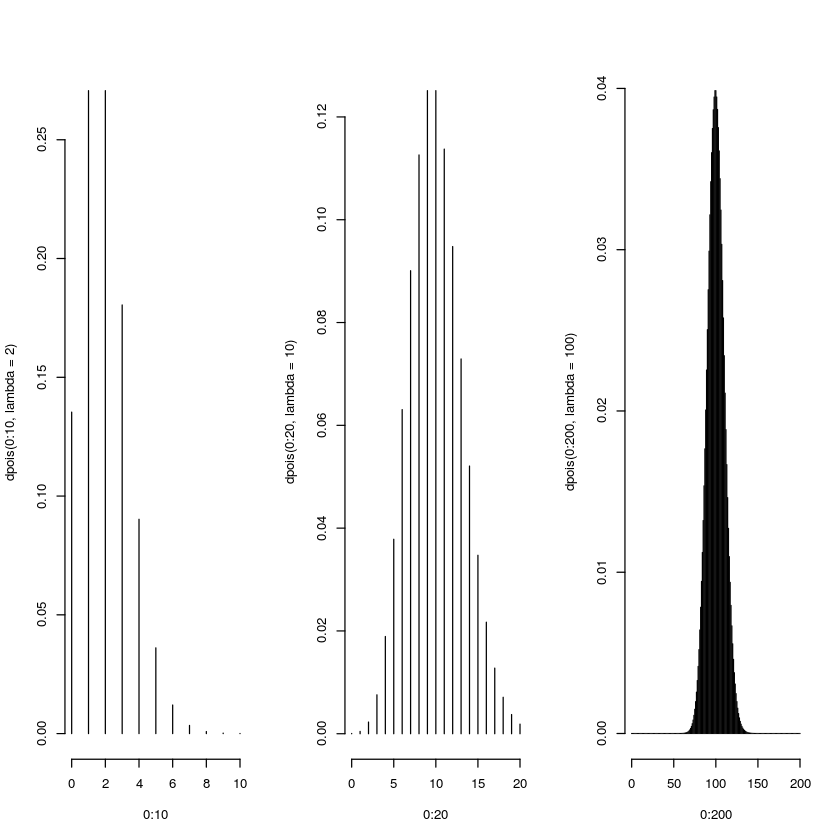

In [18]:
par(mfrow = c(1,3))
plot(0:10, dpois(0:10, lambda = 2), type = "h", frame = FALSE)
plot(0:20, dpois(0:20, lambda = 10), type = "h", frame = FALSE)
plot(0:200, dpois(0:200, lambda = 100), type = "h", frame = FALSE) # nearly normal as lambda * t approaches infinity

In [21]:
# sort of, showing that the mean and variance are equal
x <- 0:10000
lambda <- 3
mu <- sum(x * dpois(x, lambda = lambda)) # mean is 3
sigmasq <- sum((x-mu)^2 * dpois(x, lambda =lambda)) # variance is 3
c(mu, sigmasq)

[1] 3 3

In [24]:
load('./data/gaData.rda')
str(gaData)

'data.frame':	731 obs. of  3 variables:
 $ date       : Date, format: "2011-01-01" "2011-01-02" ...
 $ visits     : num  0 0 0 0 0 0 0 0 0 0 ...
 $ simplystats: num  0 0 0 0 0 0 0 0 0 0 ...


In [26]:
gaData$julian <- julian(gaData$date)
head(gaData)

,date,visits,simplystats,julian
,<date>,<dbl>,<dbl>,<dbl>
1,2011-01-01,0,0,14975
2,2011-01-02,0,0,14976
3,2011-01-03,0,0,14977
4,2011-01-04,0,0,14978
5,2011-01-05,0,0,14979
6,2011-01-06,0,0,14980


### Linear Regression  
$\text{NH}_i = b_0 + b_1 \text{JD}_i + e_i$  
- $\text{NH}_i$ Number of hits to the website
- $\text{NH}_i$ days of the year (julian day)
- $b_0$ Number of hits on Julian day 0 (1970-01-01)
- $b_1$ Increase in number of hits per day
- $e_i$ Variation due to everything we didn't measure

Linear regression的不足在于，随着$n \rightarrow \infty$，分布将更加倾向于normal distribution，从而使得linear model的预测不够精准

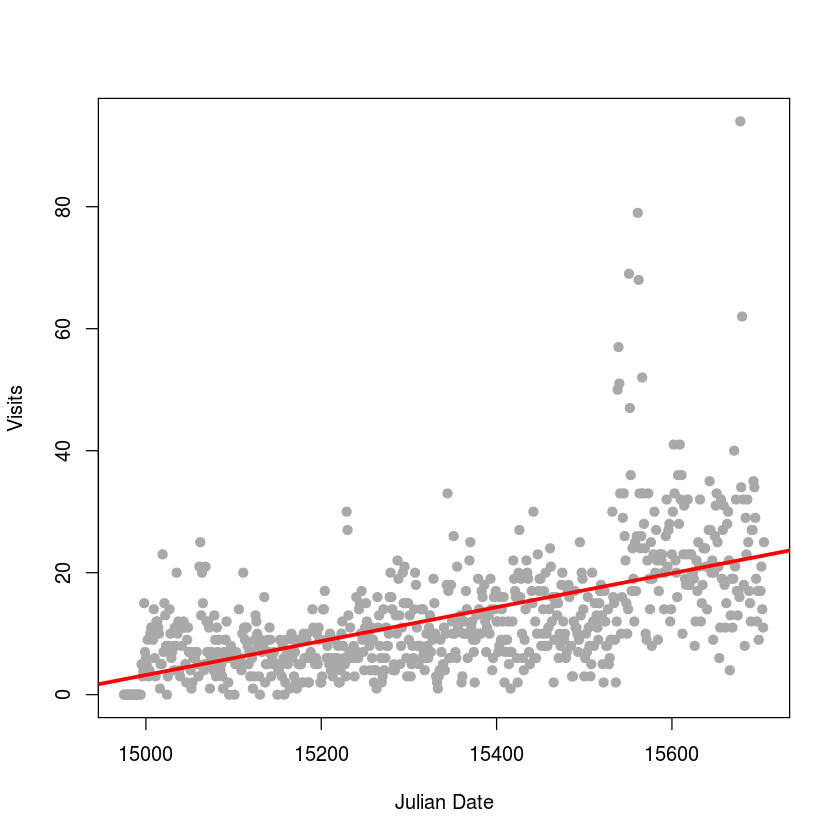

In [30]:
plot(gaData$julian, gaData$visits, pch = 19, col="darkgrey", xlab="Julian Date", ylab='Visits')
lm1 <- lm(gaData$visits ~ gaData$julian)
abline(lm1, col='red', lwd = 3)

### Aside, take the log of the outcome
$\log (\text{NH}_i) = b_0 + b_1 \text{JD}_i + e_i$  
- $\text{NH}_i$ Number of hits to the website
- $\text{NH}_i$ days of the year (julian day)
- $b_0$ Log number of hits on Julian day 0 (1970-01-01)
- $b_1$ Increase in log number of hits per day
- $e_i$ Variation due to everything we didn't measure

In [36]:
round(exp(coef(lm(I(log(gaData$visits + 1)) ~ gaData$julian))),5)

(Intercept) gaData$julian 
      0.00000       1.00231

### Linear vs Poission regression
- Linear  
$\text{NH}_i = b_0 + b_1 \text{JD}_i + e_i$  
    - or
    $E \left[ \text{NH}_i | \text{JD}_i, b_0, b_1 \right] = b_0 + b_1 \text{JD}_i$
- Poisson / log-linear  
$\log (\text{NH}_i) = b_0 + b_1 \text{JD}_i + e_i$  
    - or  
    $E \left[ \text{NH}_i | \text{JD}_i, b_0, b_1 \right] = \exp \left[ b_0 + b_1 \text{JD}_i \right]$

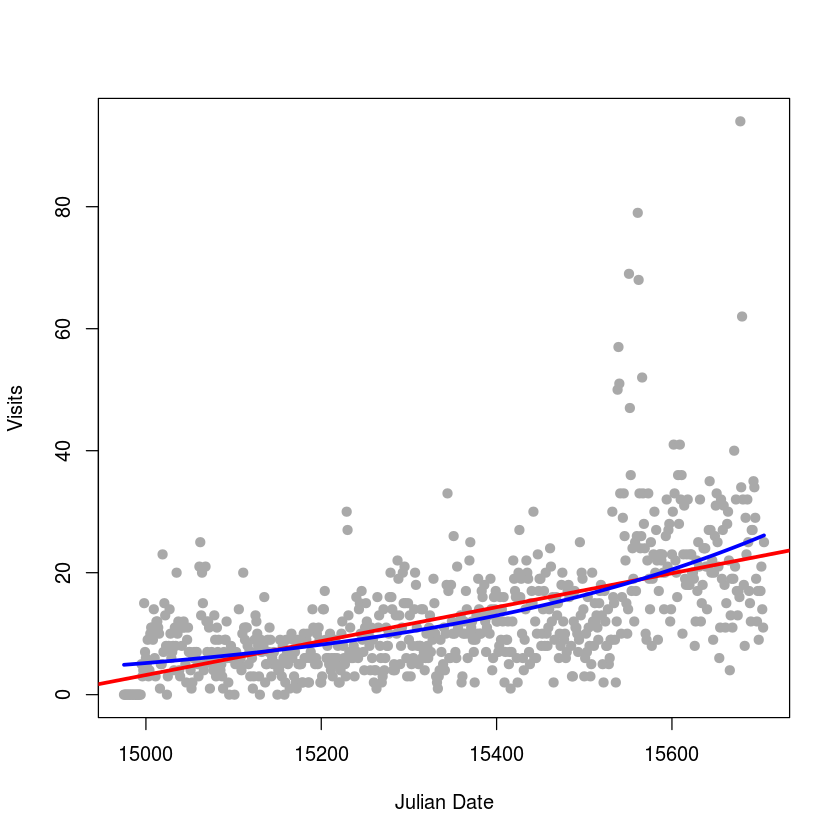

In [133]:
plot(gaData$julian, gaData$visits, pch = 19, col="darkgrey", xlab="Julian Date", ylab='Visits')
lm1 <- lm(gaData$visits ~ gaData$julian)
glm1 <- glm(gaData$visits ~ gaData$julian, family = "poisson")
abline(lm1, col='red', lwd = 3)
lines(gaData$julian, glm1$fitted, col = 'blue', lwd = 3)

### Rates

$E[\text{NHSS}_i | \text{JD}_i, b_0, b_1] / \text{NH}_{i} = \exp \left( b_0 + b_1 \text{JD}_i \right)$

$\log \left(E[\text{NHSS}_i | \text{JD}_i, b_0, b_1] \right) - \log \left( \text{NH}_i \right) = b_0 + b_1 \text{JD}_i$

$\log \left(E[\text{NHSS}_i | \text{JD}_i, b_0, b_1] \right) = \log \left( \text{NH}_i \right) + b_0 + b_1 \text{JD}_i$

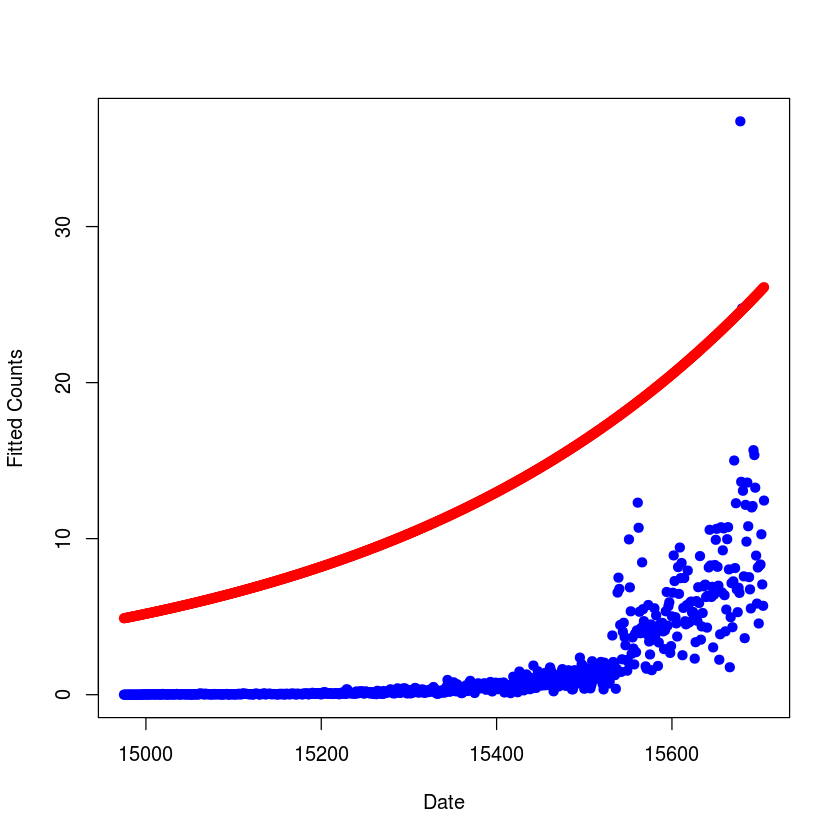

In [41]:
glm2 <- glm(gaData$simplystats ~ gaData$julian
           , offset = log(visits +1)
           , family = 'poisson'
           , data = gaData
           )
plot(julian(gaData$date)
    , glm2$fitted
    , col='blue'
    , pch = 19
    , xlab = 'Date'
    , ylab = 'Fitted Counts')
points(gaData$date
        , glm1$fitted
       , col="red"
       , pch = 19
      )

## Mismash

### Hodgepodge

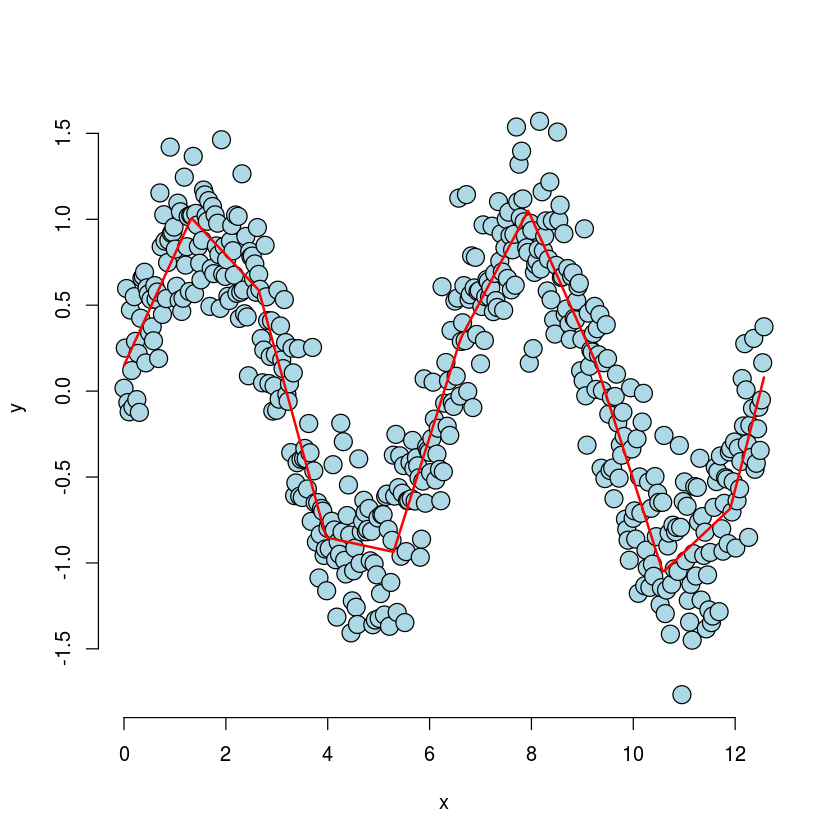

In [46]:
n <- 500
x <- seq(0, 4 * pi, length = n)
y <- sin(x) + rnorm(n, sd = 0.3)
knots <- seq(0, 8*pi, length = 20)
splineTerms <- sapply(knots, function(knot) (x > knot) * (x - knot))
xMat <- cbind(1, x, splineTerms)
yhat <- predict(lm(y ~ xMat -1))
plot(x, y, frame = FALSE, pch = 21, bg = 'lightblue', cex = 2)
lines(x, yhat, col='red', lwd = 2)

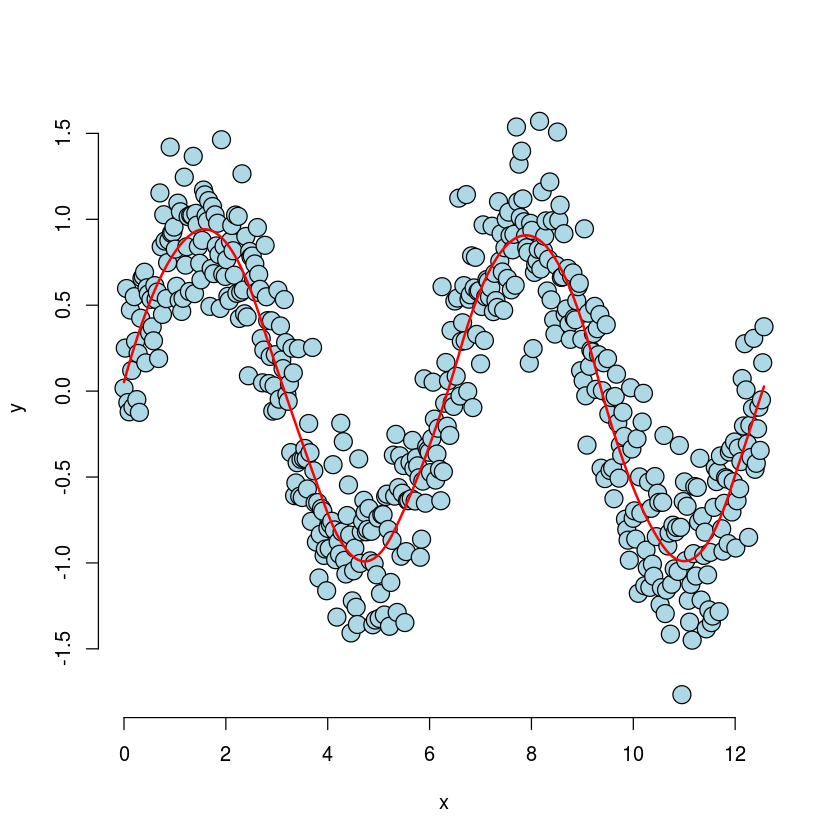

In [48]:
splineTerms <- sapply(knots, function(knot) (x > knot) * (x - knot)^2)
xMat <- cbind(1, x, x^2, splineTerms)
yhat <- predict(lm(y ~ xMat -1))
plot(x, y, frame = FALSE, pch = 21, bg = 'lightblue', cex = 2)
lines(x, yhat, col='red', lwd = 2)

In [51]:
exp(0.996229662)

[1] 2.708052

## Course Project

In [53]:
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


In [54]:
?mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 (numeric) variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    Engine (0 = V-shaped, 1 = straight)      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_N_o_t_e:

     Henderson and Velleman (1981) comment in a footnote to Table 1:
     ‘Hocking [original transcriber]'s noncrucial coding of the Mazda's
     rotary engine as a straight six-cylinder engine and the Porsche's
     flat engine as a V engine, as well as the inclusion of the diesel
     Mercedes 240D, have been retained to enable direct comparisons to
     be made with previous analyses.’

_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data", gap = 1/4)
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)
     ## possibly more meaningful, e.g., for summary() or bivariate plots:
     mtcars2 <- within(mtcars, {
        vs <- factor(vs, labels = c("V", "S"))
        am <- factor(am, labels = c("automatic", "manual"))
        cyl  <- ordered(cyl)
        gear <- ordered(gear)
        carb <- ordered(carb)
     })
     summary(mtcars2)

## Quiz 4

In [55]:
library(MASS)
?shuttle

shuttle {MASS},R Documentation


In [56]:
head(shuttle)

,stability,error,sign,wind,magn,vis,use
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,xstab,LX,pp,head,Light,no,auto
2,xstab,LX,pp,head,Medium,no,auto
3,xstab,LX,pp,head,Strong,no,auto
4,xstab,LX,pp,tail,Light,no,auto
5,xstab,LX,pp,tail,Medium,no,auto
6,xstab,LX,pp,tail,Strong,no,auto


In [57]:
unique(shuttle$use)

[1] auto   noauto
Levels: auto noauto

In [74]:
str(shuttle)

'data.frame':	256 obs. of  7 variables:
 $ stability: Factor w/ 2 levels "stab","xstab": 2 2 2 2 2 2 2 2 2 2 ...
 $ error    : Factor w/ 4 levels "LX","MM","SS",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sign     : Factor w/ 2 levels "nn","pp": 2 2 2 2 2 2 1 1 1 1 ...
 $ wind     : Factor w/ 2 levels "head","tail": 1 1 1 2 2 2 1 1 1 2 ...
 $ magn     : Factor w/ 4 levels "Light","Medium",..: 1 2 4 1 2 4 1 2 4 1 ...
 $ vis      : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ use      : Factor w/ 2 levels "auto","noauto": 1 1 1 1 1 1 1 1 1 1 ...


In [75]:
shuttle$use_binary <- as.integer(shuttle$use == "auto")

In [76]:
str(shuttle)

'data.frame':	256 obs. of  8 variables:
 $ stability : Factor w/ 2 levels "stab","xstab": 2 2 2 2 2 2 2 2 2 2 ...
 $ error     : Factor w/ 4 levels "LX","MM","SS",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ sign      : Factor w/ 2 levels "nn","pp": 2 2 2 2 2 2 1 1 1 1 ...
 $ wind      : Factor w/ 2 levels "head","tail": 1 1 1 2 2 2 1 1 1 2 ...
 $ magn      : Factor w/ 4 levels "Light","Medium",..: 1 2 4 1 2 4 1 2 4 1 ...
 $ vis       : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ use       : Factor w/ 2 levels "auto","noauto": 1 1 1 1 1 1 1 1 1 1 ...
 $ use_binary: int  1 1 1 1 1 1 1 1 1 1 ...


In [79]:
fit <- glm(use_binary ~ wind - 1, family="binomial", data = shuttle)
summary(fit)$coef

,Estimate,Std. Error,z value,Pr(>|z|)
windhead,0.2513144,0.1781742,1.410499,0.1583925
windtail,0.2831263,0.1785510,1.585689,0.1128099


In [86]:
unname(exp(coef(fit))[1]/exp(coef(fit))[2])

[1] 0.9686888

In [87]:
fit2 <- glm(use_binary ~ wind + magn -1, family = "binomial", data = shuttle)
summary(fit2)


Call:
glm(formula = use_binary ~ wind + magn - 1, family = "binomial", 
    data = shuttle)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.349  -1.321   1.015   1.040   1.184  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
windhead    3.635e-01  2.841e-01   1.280    0.201
windtail    3.955e-01  2.844e-01   1.391    0.164
magnMedium  8.955e-16  3.599e-01   0.000    1.000
magnOut    -3.795e-01  3.568e-01  -1.064    0.287
magnStrong -6.441e-02  3.590e-01  -0.179    0.858

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 354.89  on 256  degrees of freedom
Residual deviance: 348.78  on 251  degrees of freedom
AIC: 358.78

Number of Fisher Scoring iterations: 4


In [93]:
odds2 <- exp(cbind(OddsRatio = coef(fit2), confint(fit2)))
odds2

Waiting for profiling to be done...



,OddsRatio,2.5 %,97.5 %
windhead,1.4383682,0.8281020,2.534603
windtail,1.4851533,0.8548293,2.619816
magnMedium,1.0000000,0.4928642,2.028956
magnOut,0.6841941,0.3380374,1.373844
magnStrong,0.9376181,0.4627029,1.897218


In [94]:
odds2[1,1]/odds2[2,1]

[1] 0.9684981

In [96]:
library(UsingR)
data(InsectSprays)
head(InsectSprays)

,count,spray
,<dbl>,<fct>
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A


In [97]:
str(InsectSprays)

'data.frame':	72 obs. of  2 variables:
 $ count: num  10 7 20 14 14 12 10 23 17 20 ...
 $ spray: Factor w/ 6 levels "A","B","C","D",..: 1 1 1 1 1 1 1 1 1 1 ...


In [103]:
fit3 <- glm(count ~ spray -1 , family="poisson", data = InsectSprays)
summary(fit3)


Call:
glm(formula = count ~ spray - 1, family = "poisson", data = InsectSprays)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3852  -0.8876  -0.1482   0.6063   2.6922  

Coefficients:
       Estimate Std. Error z value Pr(>|z|)    
sprayA  2.67415    0.07581  35.274  < 2e-16 ***
sprayB  2.73003    0.07372  37.032  < 2e-16 ***
sprayC  0.73397    0.20000   3.670 0.000243 ***
sprayD  1.59263    0.13019  12.233  < 2e-16 ***
sprayE  1.25276    0.15430   8.119 4.71e-16 ***
sprayF  2.81341    0.07071  39.788  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 2264.808  on 72  degrees of freedom
Residual deviance:   98.329  on 66  degrees of freedom
AIC: 376.59

Number of Fisher Scoring iterations: 5


In [104]:
fit3$coefficients

sprayA    sprayB    sprayC    sprayD    sprayE    sprayF 
2.6741486 2.7300291 0.7339692 1.5926308 1.2527630 2.8134107

In [108]:
round(unname(exp(fit3$coefficients)[1]/exp(fit3$coefficients)[2]),4)

[1] 0.9457

In [110]:
log(10)

[1] 2.302585

In [114]:
x <- -5:5
y <- c(5.12, 3.93, 2.67, 1.87, 0.52, 0.08, 0.93, 2.05, 2.54, 3.87, 4.97)
knots <- c(0)

splineTerms <- sapply(knots, function(knot)(x>knot) * (x-knot))
xmat <- cbind(1, x, splineTerms)
fit <- lm(y ~ xmat - 1)
summary(fit)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
xmat,-0.1825806,0.13557812,-1.346682,2.149877e-01
xmatx,-1.0241584,0.04805280,-21.313188,2.470198e-08
xmat,2.0372258,0.08574713,23.758531,1.048711e-08


In [115]:
yhat <- predict(fit)

In [118]:
(yhat[10]-yhat[6])/4

10 
1.013067

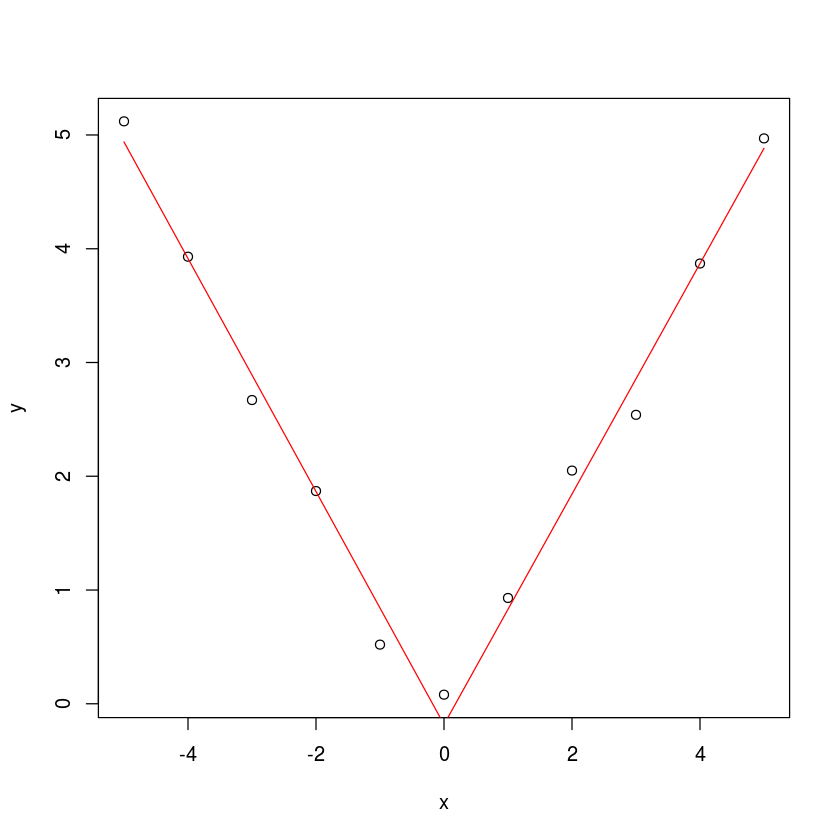

In [120]:
plot(x,y)
lines(x, yhat, col="red")

## Regression Models Course Project

### Question
You work for *Motor Trend*, a magazine about the automobile industry. Looking at a data set of a collection of cars, they are interested in exploring the relationship between a set of variables and miles per gallon (MPG) (outcome). They are particularly interested in the following two questions:

- “Is an automatic or manual transmission better for MPG”
- "Quantify the MPG difference between automatic and manual transmissions"

### Quick answers
- An manual transmission better for MPG
- Weight and drive speed affect mpg
    - Weight increase leads to mpg decrease
        - With weight increase 1000 lbs, the mpg decease by about 4 for automatic cars, and about 6 for manual cars
    - Drive speed increase ledas to mpg increase
        - With speed increase 1 second per 1/4 mile, the mpg increase about 0.8 for automatic cars, and about 1.4 for manual cars

### Enviroment settings

In [150]:
library(car)
data(mtcars)
head(mtcars)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


And each column class is following

In [151]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


### EDA

There are 10 variables that may effect dependent variable `mpg`,we first check the correlations

In [154]:
cor(mtcars$mpg, mtcars[,-1])

cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
-0.852162,-0.8475514,-0.7761684,0.6811719,-0.8676594,0.418684,0.6640389,0.5998324,0.4802848,-0.5509251


So that for the 10 independent variables
- 5 may be positively related, including drat, qsec, vs, am, gear
- 5 may be negatively related, including cyl, disp, hp, wt, carb

### Which transmission is better for MPG

We need to change `am` class from numeric to factor

Besides, check column meanings using `?mtcars`, we see am=0 denotes automatic transmission, and am=1 for manual transmission

In [155]:
mtcars$am = factor(mtcars$am)
levels(mtcars$am) <- c("Automatic", "Manual")

A box plot with transmission type in x axis and mpg in y axis shows that in genral, the **manual type autos drive more miles per gallon.**

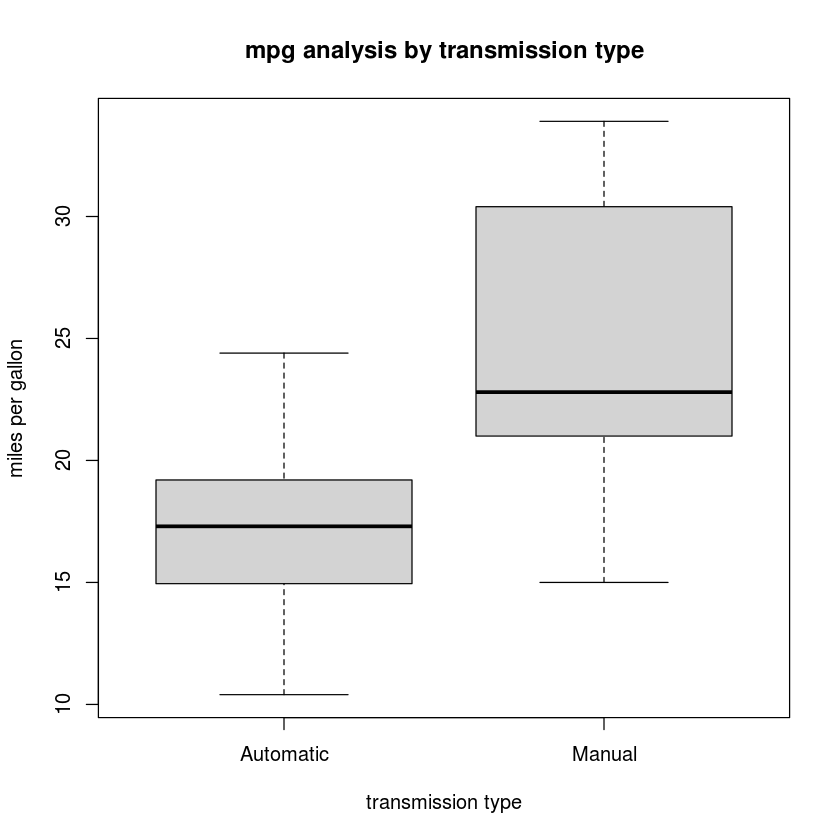

In [157]:
boxplot(mtcars$mpg ~ mtcars$am, data = mtcars, xlab="transmission type", ylab="miles per gallon", main = "mpg analysis by transmission type")

### MPG difference between automatic and manual transmissions - Quantify analysis

In [163]:
fit <-  step(lm(mpg ~ . , data = mtcars), trace = 0, steps = 10000)
summary(fit)


Call:
lm(formula = mpg ~ wt + qsec + am, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4811 -1.5555 -0.7257  1.4110  4.6610 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.6178     6.9596   1.382 0.177915    
wt           -3.9165     0.7112  -5.507 6.95e-06 ***
qsec          1.2259     0.2887   4.247 0.000216 ***
amManual      2.9358     1.4109   2.081 0.046716 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.459 on 28 degrees of freedom
Multiple R-squared:  0.8497,	Adjusted R-squared:  0.8336 
F-statistic: 52.75 on 3 and 28 DF,  p-value: 1.21e-11


So that we get 3 out of 10 independent variables of importance to mpg change: wt, qsec, and am, with $R^2 = 0.85$

Furthermore, we examine mpg ~ wt + qest correlation with am

In [164]:
fit2 <- lm(mpg ~ am:wt + am:qsec, data = mtcars)
summary(fit2)


Call:
lm(formula = mpg ~ am:wt + am:qsec, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9361 -1.4017 -0.1551  1.2695  3.8862 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       13.9692     5.7756   2.419  0.02259 *  
amAutomatic:wt    -3.1759     0.6362  -4.992 3.11e-05 ***
amManual:wt       -6.0992     0.9685  -6.297 9.70e-07 ***
amAutomatic:qsec   0.8338     0.2602   3.205  0.00346 ** 
amManual:qsec      1.4464     0.2692   5.373 1.12e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.097 on 27 degrees of freedom
Multiple R-squared:  0.8946,	Adjusted R-squared:  0.879 
F-statistic: 57.28 on 4 and 27 DF,  p-value: 8.424e-13


With total $R^2$ of 90%, all the coefficients are significant, and we have the following conclusions

- Weight increase leads to mpg decrease
    - With weight increase 1000 lbs, the mpg decease by about 4 for automatic cars, and about 6 for manual cars
- Drive speed increase ledas to mpg increase
    - With speed increase 1 second per 1/4 mile, the mpg increase about 0.8 for automatic cars, and about 1.4 for manual cars